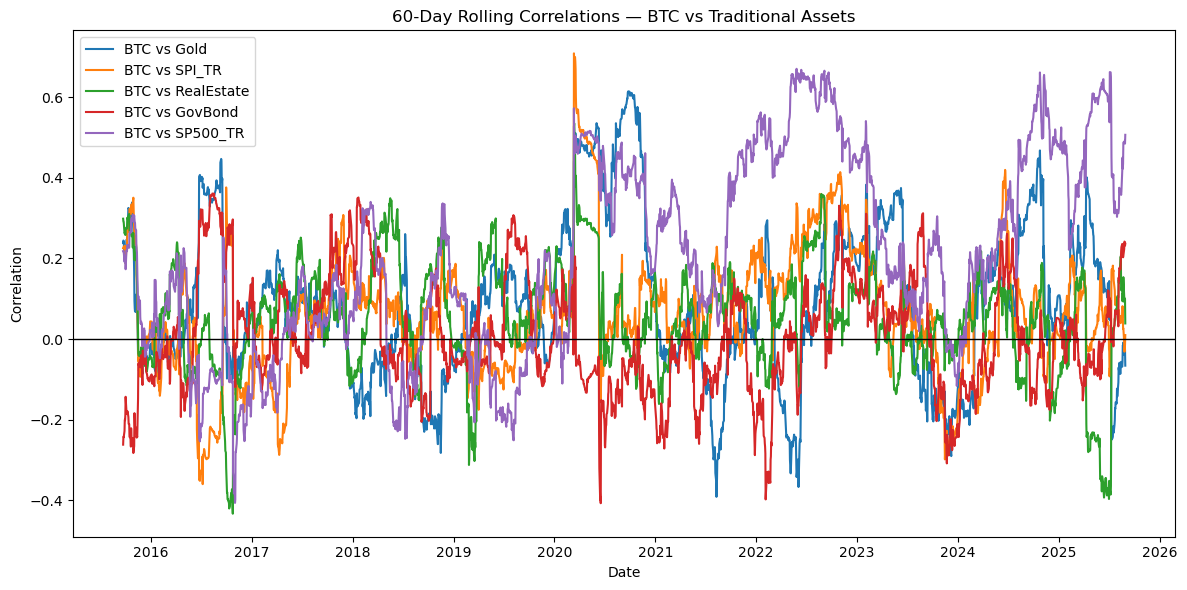

✅ 60-Day Rolling Correlations saved to: C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\RollingCorrelations_BTC_60D.xlsx

=== Descriptive Statistics of Rolling Correlations ===
             count   mean    std    min    25%    50%    75%    max
Gold        2495.0  0.088  0.190 -0.391 -0.039  0.071  0.192  0.614
SPI_TR      2495.0  0.065  0.150 -0.359 -0.015  0.056  0.140  0.709
RealEstate  2495.0  0.051  0.131 -0.433 -0.018  0.051  0.128  0.535
GovBond     2495.0  0.005  0.141 -0.407 -0.090 -0.016  0.096  0.361
SP500_TR    2495.0  0.206  0.238 -0.406  0.017  0.181  0.414  0.670


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 1) Define file paths ===
base = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit"

paths = {
    "BTC":        fr"{base}\Data_Masterthesis_BTCCHF_returns.xlsx",
    "Gold":       fr"{base}\Data_Masterthesis_GoldCHF_returns.xlsx",
    "SPI_TR":     fr"{base}\Data_Masterthesis_SPITRCHF_returns.xlsx",
    "RealEstate": fr"{base}\Data_Masterthesis_RealEstateCHF_returns.xlsx",
    "GovBond":    fr"{base}\Data_Masterthesis_GovBondCHF_returns.xlsx",
    "SP500_TR":   fr"{base}\Data_Masterthesis_SP500TR_returns.xlsx",
}

sheets_daily = {
    "BTC":        "BTCCHF daily + ret",
    "Gold":       "GoldCHF daily + ret",
    "SPI_TR":     "SPITRCHF daily + ret",
    "RealEstate": "RealEstateCHF daily + ret",
    "GovBond":    "GovBondCHF daily + ret",
    "SP500_TR":   "SP500TR daily + ret",
}

ret_cols = {
    "BTC": "BTC_ret",
    "Gold": "Gold_ret",
    "SPI_TR": "SPI_TR_ret",
    "RealEstate": "RealEstate_ret",
    "GovBond": "GovBond_ret",
    "SP500_TR": "SP500_TR_ret",
}

# === 2) Load and merge daily log returns (same as before) ===
frames = []
for name, p in paths.items():
    df = pd.read_excel(p, sheet_name=sheets_daily[name], index_col=0, parse_dates=True)
    df = df[[ret_cols[name]]].rename(columns={ret_cols[name]: name})
    frames.append(df)
daily = pd.concat(frames, axis=1, join="inner").dropna()

# === 3) Define 60-day rolling window for BTC vs each asset ===
window = 60  # 60 trading days ≈ 3 months

rolling_corrs = pd.DataFrame(index=daily.index)
for col in daily.columns:
    if col != "BTC":
        rolling_corrs[col] = daily['BTC'].rolling(window).corr(daily[col])

# === 4) Plot all rolling correlations ===
plt.figure(figsize=(12, 6))
for col in rolling_corrs.columns:
    plt.plot(rolling_corrs.index, rolling_corrs[col], label=f'BTC vs {col}')
plt.axhline(0, color='black', lw=1)
plt.title('60-Day Rolling Correlations — BTC vs Traditional Assets')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

# === 5) Optional: Save to Excel for documentation ===
out_path = fr"{base}\RollingCorrelations_BTC_60D.xlsx"
rolling_corrs.to_excel(out_path, sheet_name="BTC_60D_RollingCorr")
print(f"✅ 60-Day Rolling Correlations saved to: {out_path}")

# === 6) Optional: Descriptive statistics of rolling correlations ===
print("\n=== Descriptive Statistics of Rolling Correlations ===")
print(rolling_corrs.describe().T.round(3))
